# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [3]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [ ]:
def max_element(x):
    if len(x) < 2:
        return None

    # Создаем маску для элементов, которые следуют сразу после нулевого
    zero_mask = np.zeros(len(x), dtype=bool)
    zero_mask[:-1] = (x[:-1] == 0)  # Проверяем, равен ли предыдущий элемент нулю

    # Если нет нулевых элементов, возвращаем None
    if not np.any(zero_mask):
        return None

    # Выбираем элементы, которые следуют после нулевых
    elements_after_zero = x[1:][zero_mask[:-1]]

    # Находим максимальный элемент
    return np.max(elements_after_zero)

In [ ]:
max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])) # Проверяем ответ

np.int64(5)

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [ ]:
def nearest_value(X, v):
    X = np.array(X)
    return X.flat[np.argmin(np.abs(X - v))]

In [ ]:
nearest_value(np.arange(0,10).reshape((2, 5)), 3.6) # Проверяем ответ

np.int64(4)

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [ ]:
def scale(X):
    X = np.array(X, dtype=float)

    # Вычисляем среднее по каждому столбцу
    column_means = np.mean(X, axis=0)

    # Вычисляем стандартное отклонение по каждому столбцу
    column_stds = np.std(X, axis=0, ddof=1)  # ddof=1 для выборочного стандартного отклонения

    # Защита от деления на ноль: заменяем нулевые стандартные отклонения на 1
    # Это сохранит исходные значения (только центрирование без масштабирования)
    column_stds[column_stds == 0] = 1

    # Масштабируем: вычитаем среднее и делим на стандартное отклонение
    X_scaled = (X - column_means) / column_stds

    return X_scaled

In [ ]:
scale(np.random.randint(0, 100, size=(4, 4)))

array([[-0.63940447,  0.95961035, -0.46075142,  0.37052933],
       [-0.45671748,  0.54464371, -1.00281191,  0.97685004],
       [-0.39582181, -1.32270615,  1.32804821, -1.38106385],
       [ 1.49194376, -0.1815479 ,  0.13551512,  0.03368448]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [ ]:
def get_stats(X):
    X = np.array(X, dtype=float)

    # Проверяем, что матрица квадратная
    if X.ndim != 2 or X.shape[0] != X.shape[1]:
        raise ValueError("Матрица должна быть квадратной")

    characteristics = {}

    try:
        # 1. Определитель (детерминант)
        characteristics['determinant'] = np.linalg.det(X)
    except np.LinAlgError:
        characteristics['determinant'] = None

    # 2. След (сумма диагональных элементов)
    characteristics['trace'] = np.trace(X)

    # 3. Наименьший и наибольший элементы
    characteristics['min_element'] = np.min(X)
    characteristics['max_element'] = np.max(X)

    # 4. Норма Фробениуса
    characteristics['frobenius_norm'] = np.linalg.norm(X, 'fro')

    try:
        # 5. Собственные числа
        eigenvalues = np.linalg.eigvals(X)
        characteristics['eigenvalues'] = eigenvalues
    except np.linalg.LinAlgError:
        characteristics['eigenvalues'] = None

    try:
        # 6. Обратная матрица (если определитель не равен 0)
        if characteristics['determinant'] != 0:
            characteristics['inverse'] = np.linalg.inv(X)
        else:
            characteristics['inverse'] = None
    except np.linalg.LinAlgError:
        characteristics['inverse'] = None

    return characteristics

In [ ]:
chars = get_stats(scale(np.random.normal(loc=10, scale=1, size=(10, 10))))

print(f"1. Определитель: {chars['determinant']:.6f}")
print(f"2. След: {chars['trace']:.6f}")
print(f"3. Наименьший элемент: {chars['min_element']:.6f}")
print(f"4. Наибольший элемент: {chars['max_element']:.6f}")
print(f"5. Норма Фробениуса: {chars['frobenius_norm']:.6f}")

if chars['eigenvalues'] is not None:
   print("6. Собственные числа:")
   for i, eigval in enumerate(chars['eigenvalues']):
    print(f"   λ{i+1} = {eigval:.6f}")
   else:
    print("6. Собственные числа: не удалось вычислить")

   if chars['inverse'] is not None:
    print("7. Обратная матрица (первые 3x3 элемента):")
    print(chars['inverse'][:3, :3] if chars['inverse'].shape[0] > 3 else chars['inverse'])
   else:
    print("7. Обратная матрица: не существует или не удалось вычислить")

1. Определитель: 0.000000
2. След: -1.382233
3. Наименьший элемент: -2.155984
4. Наибольший элемент: 2.266147
5. Норма Фробениуса: 9.486833
6. Собственные числа:
   λ1 = -3.083244+0.000000j
   λ2 = -2.437371+1.015452j
   λ3 = -2.437371-1.015452j
   λ4 = 3.131163+0.000000j
   λ5 = 0.075849+2.018786j
   λ6 = 0.075849-2.018786j
   λ7 = 1.544031+0.622950j
   λ8 = 1.544031-0.622950j
   λ9 = 0.204830+0.000000j
   λ10 = -0.000000+0.000000j
6. Собственные числа: не удалось вычислить
7. Обратная матрица (первые 3x3 элемента):
[[-3.16793030e+12 -3.16793030e+12 -3.16793030e+12]
 [ 1.88390909e+13  1.88390909e+13  1.88390909e+13]
 [ 9.11787606e+12  9.11787606e+12  9.11787606e+12]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [ ]:
max_elements = []

for exp_num in range(100):
  # Генерируем две матрицы из стандартного нормального распределения N(0,1)
  A = np.random.normal(loc=0, scale=1, size=(10, 10))
  B = np.random.normal(loc=0, scale=1, size=(10, 10))

  # Перемножаем матрицы
  C = A @ B

  # Находим максимальный элемент
  max_elements.append(np.max(C))

max_elements = np.array(max_elements)

print(f"Среднее значение: {np.mean(max_elements):.6f}")
print(f"95-процентная квантиль: {np.quantile(max_elements, 0.95):.6f}")

Среднее значение: 8.429966
95-процентная квантиль: 11.432676


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [5]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('2008.csv')

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
cancellation_counts = df['CancellationCode'].value_counts()
print(cancellation_counts)

# Расшифровка кодов (согласно описанию данных)
code_explanations = {
    'A': 'Carrier (Авиакомпания)',
    'B': 'Weather (Погода)',
    'C': 'National Air System (Национальная авиасистема)',
    'D': 'Security (Безопасность)'
}

most_common = cancellation_counts.index[0]
explanation = code_explanations.get(most_common, 'Неизвестный код')
print(f"\nСАМАЯ ЧАСТАЯ ПРИЧИНА")
print(f"Код: {most_common} - {explanation}")
print(f"Количество: {cancellation_counts[most_common]:,}")

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

САМАЯ ЧАСТАЯ ПРИЧИНА
Код: A - Carrier (Авиакомпания)
Количество: 563


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [ ]:
distance_data = df['Distance']

# Убираем пропущенные значения для анализа
clean_distance = distance_data.dropna()

print(f"Среднее расстояние: {clean_distance.mean():.2f} миль")
print(f"Минимальное расстояние: {clean_distance.min():.2f} миль")
print(f"Максимальное расстояние: {clean_distance.max():.2f} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31.00 миль
Максимальное расстояние: 4962.00 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:
smallest_fly = df.nsmallest(10, 'Distance')
for i, (idx, row) in enumerate(smallest_fly.iterrows(), 1):
  distance = row['Distance']
  flight = row.get('FlightNum', 'N/A')
  date = f"{row.get('Month', 'N/A')}/{row.get('DayofMonth', 'N/A')}/{row.get('Year', '2008')}"

  print(f"{i:2d}. ({flight}) - {distance} миль - {date}")


 1. (65) - 31 миль - 12/30/2008
 2. (65) - 31 миль - 12/26/2008
 3. (64) - 31 миль - 8/18/2008
 4. (64) - 31 миль - 3/11/2008
 5. (65) - 31 миль - 8/9/2008
 6. (64) - 31 миль - 2/28/2008
 7. (5427) - 36 миль - 1/1/2008
 8. (5524) - 36 миль - 1/5/2008
 9. (71) - 41 миль - 7/29/2008
10. (77) - 41 миль - 8/24/2008


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [ ]:
!uv pip install airportsdata
import airportsdata

# Подсчет вылетов по аэропортам
departure_counts = df['Origin'].value_counts()
iata_airports = airportsdata.load('IATA')  # https://pypi.org/project/airportsdata/
print(f"Код аэропорта - {departure_counts.index[0]}, колличество вылетов - {departure_counts.iloc[0]}, Город - {iata_airports[departure_counts.index[0]]['city']}")

Using Python 3.12.12 environment at: /usr
Audited 1 package in 134ms
Код аэропорта - ATL, колличество вылетов - 4134, Город - Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [ ]:
# Фильтруем валидные данные
valid_flights = df[df['AirTime'].notna() & (df['AirTime'] > 0)]
# Группируем по аэропорту вылета и вычисляем среднее время полета
airport_airtime = valid_flights.groupby('Origin')['AirTime'].agg([
  'mean'  # Среднее время полета
]).round(2)

# Сортируем по среднему времени полета (по убыванию)
airport_airtime_sorted = airport_airtime.sort_values('mean', ascending=False)

print(f"Аэропорт - {airport_airtime_sorted.index[0]}, среднее время (минут) - {airport_airtime_sorted.iloc[0]}")

Аэропорт - SJU, среднее время (минут) - mean    205.2
Name: SJU, dtype: float64


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [ ]:
# Фильтруем валидные данные (убираем пропущенные значения)
valid_flights = df[df['DepDelay'].notna()].copy()
# Группируем по аэропорту вылета
airport_groups = valid_flights.groupby('Origin')
# Фильтруем группы с достаточным количеством рейсов
filtered_airports = airport_groups.filter(lambda x: len(x) >= 1000)

# Сортируем по доле задержанных рейсов (по убыванию)
airport_stats_sorted = filtered_airports.sort_values('DepDelay', ascending=False)


print(f"Аэропорт - {airport_stats_sorted.Origin.iloc[0]}, доля задержек - {airport_stats_sorted.DepDelay.iloc[0]}")

Аэропорт - MCO, доля задержек - 750.0


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [71]:
# Загрузка данных
import pandas as pd
import numpy as np
df = pd.read_csv('2008.csv')

# 1. Имеются ли в данных пропущенные значения?
has_missing = df.isnull().any().any()
print(has_missing)

# 2. Сколько всего пропущенных элементов в таблице "объект-признак"?
total_missing = df.isnull().sum().sum()
print(total_missing)

# 3. Сколько объектов имеют хотя бы один пропуск?
objects_with_missing = df.isnull().any(axis=1).sum()
print(objects_with_missing)

# 4. Сколько признаков имеют хотя бы одно пропущенное значение?
features_with_missing = df.isnull().any(axis=0).sum()
print(features_with_missing)

True
355215
70000
16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [72]:
missing_target = df['DepDelay'].isnull().sum()
total_target = len(df['DepDelay'])

print(f"Пропущенных значений: {missing_target} из {total_target}")

Пропущенных значений: 1399 из 70000


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [73]:
# Список временных признаков для преобразования
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

for time_col in time_columns:
  # Проверяем тип данных и пропуски
  original_dtype = df[time_col].dtype
  missing_count = df[time_col].isnull().sum()
  total_count = len(df[time_col])

  # Создаем новые признаки для часов и минут
  hour_col = f"{time_col}_Hour"
  minute_col = f"{time_col}_Minute"

  # Инициализируем новые столбцы с NaN
  df[hour_col] = np.nan
  df[minute_col] = np.nan

  # Преобразуем только не-NaN значения
  valid_mask = df[time_col].notna()
  valid_count = valid_mask.sum()

  # Преобразуем в строки с ведущими нулями (4 цифры)
  time_strings = df.loc[valid_mask, time_col].astype(int).astype(str).str.zfill(4)

  # Извлекаем часы (первые 2 цифры) и минуты (последние 2 цифры)
  df.loc[valid_mask, hour_col] = time_strings.str[:2].astype(int)
  df.loc[valid_mask, minute_col] = time_strings.str[2:].astype(int)

In [74]:
print(df[['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']])

       DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute  \
0              21.0            11.0             20.0               55.0   
1              14.0            26.0             14.0               10.0   
2              11.0            43.0             11.0               45.0   
3              11.0            41.0             11.0               44.0   
4               8.0            15.0              8.0               20.0   
...             ...             ...              ...                ...   
69995          18.0            29.0             18.0               40.0   
69996          11.0            49.0             11.0               25.0   
69997          10.0            12.0             10.0               12.0   
69998          19.0             6.0             19.0                0.0   
69999           8.0            59.0              9.0                0.0   

       ArrTime_Hour  ArrTime_Minute  CRSArrTime_Hour  CRSArrTime_Minute  
0              23.0      

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [75]:
# Выбираем только числовые признаки
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'DepDelay']
# Вычисляем корреляции с целевой переменной
correlations = {}
for col in numeric_columns:
  # Убираем пропуски для корректного расчета корреляции
  valid_data = df[['DepDelay', col]].dropna()
  if len(valid_data) > 1:
    corr, _ = pearsonr(valid_data['DepDelay'], valid_data[col])
    correlations[col] = abs(corr)
# Сортируем по абсолютному значению корреляции
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
problematic_features = [item[0] for item in sorted_correlations[0:5]]
problematic_features.append('TailNum')
problematic_features.append('Year')
print(problematic_features)
df = df.drop(columns=problematic_features)

X = df

['Year', 'ArrDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'TailNum', 'Year']


/tmp/ipython-input-1022843127.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(valid_data['DepDelay'], valid_data[col])


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

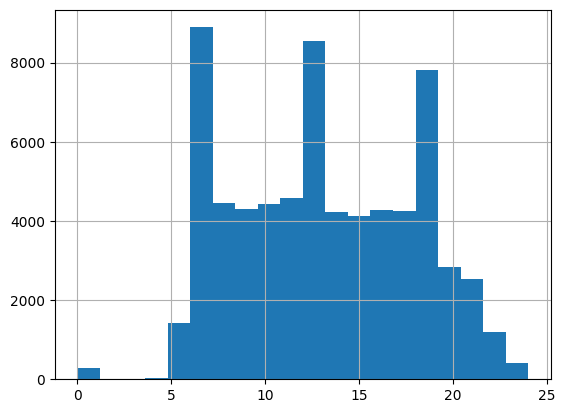

In [76]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

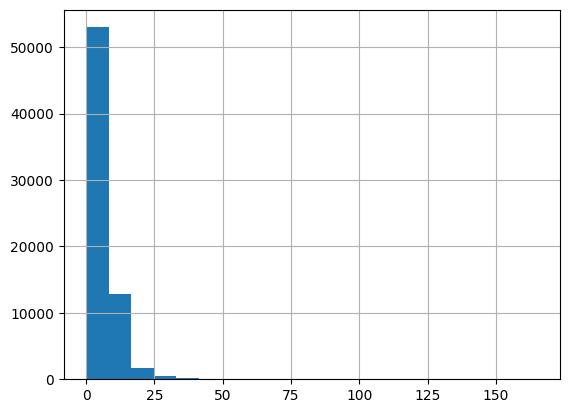

In [77]:
X['TaxiIn'].hist(bins=20)

<Axes: >

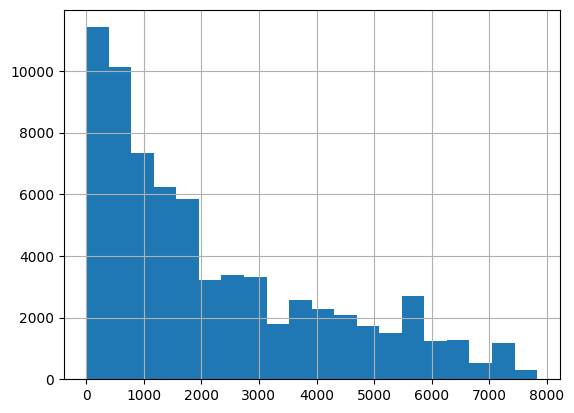

In [78]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [79]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
  # 1. Идентифицируем типы признаков
  numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
  categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

  # 2. Обработка пропущенных значений
  for col in numeric_features:
    X[col] = X[col].fillna(0)

  for col in categorical_features:
    X[col] = X[col].fillna('nan')

  # 3. Масштабирование вещественных признаков
  if numeric_features:
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(X[numeric_features])
    scaled_df = pd.DataFrame(scaled_numeric, columns=[f"{col}_scaled" for col in numeric_features],
                               index=X.index)
  else:
    scaled_df = pd.DataFrame(index=X.index)

  # 4. One-hot-кодирование категориальных признаков
  if categorical_features:
    categorical_dummies = pd.get_dummies(X[categorical_features],
      prefix=categorical_features, prefix_sep='_')
  else:
    categorical_dummies = pd.DataFrame(index=X.index)

  # 5. Собираем финальный DataFrame
  final_df = pd.concat([scaled_df, categorical_dummies], axis=1)

  print(f"Преобразовано: {df.shape} → {final_df.shape}")
  return final_df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [80]:
transform_data(X)

Преобразовано: (70000, 31) → (70000, 647)
       Month_scaled  DayofMonth_scaled  DayOfWeek_scaled  DepTime_scaled  \
0         -0.111232           0.256159         -0.463891        1.588920   
1         -0.111232          -1.332282         -0.463891        0.239500   
2          0.473737          -1.445742          1.540176       -0.317997   
3         -1.573653           0.823459         -0.463891       -0.321937   
4         -0.403716          -1.332282          1.540176       -0.964143   
...             ...                ...               ...             ...   
69995     -0.403716          -0.424602         -1.465925        1.033393   
69996     -0.403716          -0.538062          1.540176       -0.306178   
69997      0.766221           0.936919         -0.463891       -0.576062   
69998     -1.281169           0.256159         -1.465925        1.185079   
69999      1.643674          -1.105362          1.039159       -0.877465   

       CRSDepTime_scaled  ArrTime_scaled  CRS

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [84]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size=0.3, random_state=42):
    """Разбивает данные на обучающую и контрольную выборки 70/30."""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"Данные разбиты: {X.shape[0]} -> train {X_train.shape[0]}, test {X_test.shape[0]}")
    return X_train, X_test, y_train, y_test

X = df.drop('DepTime', axis=1)
y = df['DepTime']

split_data(X, y)

Данные разбиты: 70000 -> train 49000, test 21000


(       Month  DayofMonth  DayOfWeek  CRSDepTime  ArrTime  CRSArrTime  \
 68681      2          20          3        1210   1754.0        1555   
 19961      5          29          4        1305   1354.0        1410   
 11040      7          18          5        1105   1308.0        1325   
 27673      5          12          1         630    807.0         848   
 22876      8           4          1        1843    132.0         144   
 ...      ...         ...        ...         ...      ...         ...   
 37194     12          11          4        1440   1720.0        1605   
 6265       3          12          3        1050   1324.0        1315   
 54886      3          17          1         845   1121.0        1120   
 860        5          28          3        2013   2250.0        2258   
 15795      2           4          1        2135   2217.0        2231   
 
       UniqueCarrier  FlightNum  ActualElapsedTime  CRSElapsedTime  ...  \
 68681            AA       1075              16

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?